In [90]:
import pandas as pd
import csv
import string
from matplotlib import pyplot as plt
import tensorflow as tf
import nltk
import pickle as pkl
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [34]:
%matplotlib inline

In [89]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aakritigupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aakritigupta/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
data_train = pd.read_csv('train.csv',na_values=[""])

In [40]:
data_train.question_text = [x.lower() for x in data_train.question_text]

In [41]:
data_train.question_text = [''.join(c for c in x if c not in string.punctuation) for x in data_train.question_text] 

In [42]:
data_train.question_text = [''.join(c for c in x if c not in '0123456789') for x in data_train.question_text]

In [43]:
text_lengths = [len(x.split()) for x in data_train.question_text]

(array([3.50000e+01, 6.72800e+03, 6.79720e+04, 1.85008e+05, 2.49985e+05,
        2.17055e+05, 1.57881e+05, 1.09669e+05, 7.78250e+04, 5.57830e+04,
        4.20060e+04, 3.26760e+04, 2.54500e+04, 1.94220e+04, 1.40520e+04,
        9.86100e+03, 7.31200e+03, 6.06800e+03, 5.11900e+03, 4.56000e+03,
        3.90500e+03, 2.90700e+03, 2.04200e+03, 1.39800e+03, 7.60000e+02]),
 array([ 0.  ,  1.96,  3.92,  5.88,  7.84,  9.8 , 11.76, 13.72, 15.68,
        17.64, 19.6 , 21.56, 23.52, 25.48, 27.44, 29.4 , 31.36, 33.32,
        35.28, 37.24, 39.2 , 41.16, 43.12, 45.08, 47.04, 49.  ]),
 <a list of 25 Patch objects>)

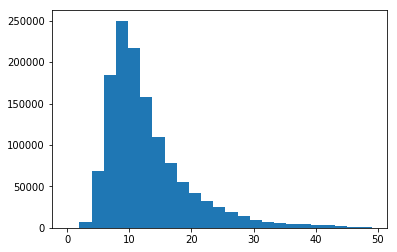

In [44]:
text_lengths = [x for x in text_lengths if x < 50]
plt.hist(text_lengths, bins=25)

In [56]:
data_train = data_train[:100]

In [57]:
data_train.question_text = data_train.apply(lambda row: nltk.word_tokenize(row['question_text']), axis=1)

/Users/aakritigupta/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [58]:
data_train.question_text

0     [how, did, quebec, nationalists, see, their, p...
1     [do, you, have, an, adopted, dog, how, would, ...
2     [why, does, velocity, affect, time, does, velo...
3     [how, did, otto, von, guericke, used, the, mag...
4     [can, i, convert, montra, helicon, d, to, a, m...
5     [is, gaza, slowly, becoming, auschwitz, dachau...
6     [why, does, quora, automatically, ban, conserv...
7     [is, it, crazy, if, i, wash, or, wipe, my, gro...
8     [is, there, such, a, thing, as, dressing, mode...
9     [is, it, just, me, or, have, you, ever, been, ...
10               [what, can, you, say, about, feminism]
11           [how, were, the, calgary, flames, founded]
12    [what, is, the, dumbest, yet, possibly, true, ...
13    [can, we, use, our, external, hard, disk, as, ...
14    [i, am, living, at, home, and, have, no, boyfr...
15    [what, do, you, know, about, bram, fischer, an...
16    [how, difficult, is, it, to, find, a, good, in...
17        [have, you, licked, the, skin, of, a, 

In [102]:
stop_words = set(stopwords.words('english'))
def removeStopwords(word_tokens):
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return filtered_sentence
data_train["question_text2"] = data_train.apply(lambda row: removeStopwords(row['question_text']), axis=1)
data_train.head()

,qid,question_text,target,question_text2
0,00002165364db923c7e6,"[how, did, quebec, nationalists, see, their, p...",0,"[quebec, nationalists, see, province, nation]"
1,000032939017120e6e44,"[do, you, have, an, adopted, dog, how, would, ...",0,"[adopted, dog, would, encourage, people, adopt..."
2,0000412ca6e4628ce2cf,"[why, does, velocity, affect, time, does, velo...",0,"[velocity, affect, time, velocity, affect, spa..."
3,000042bf85aa498cd78e,"[how, did, otto, von, guericke, used, the, mag...",0,"[otto, von, guericke, used, magdeburg, hemisph..."
4,0000455dfa3e01eae3af,"[can, i, convert, montra, helicon, d, to, a, m...",0,"[convert, montra, helicon, mountain, bike, cha..."


In [82]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin', binary=True)

In [104]:
data_train.question_vectors = data_train.apply(lambda row: model[row['question_text2']], axis=1)

KeyError: ("word 'guericke' not in vocabulary", 'occurred at index 3')